In [1]:
%matplotlib inline 
import numpy as np
from matplotlib import pyplot as plt

### Utility functions

In [2]:

def obj(w):
    ## calculates the obj functions
    r = X*w-y;
    return np.sum(np.multiply(r,r))/2 +  lamda * np.sum(np.abs(w))


## Data

In [3]:
np.random.seed(50)

N = 100
dim = 30
lamda = 1/np.sqrt(N);

w = np.zeros(dim)
n_nonzero = 15
w[np.random.choice(range(dim), n_nonzero, False)] = np.random.randn(n_nonzero)
w = np.matrix(w.reshape(-1, 1))

X = np.matrix(np.random.multivariate_normal([0.0]*dim, np.eye(dim), size = N))
y = X*w

Our objective function of interest is:
$$\frac{1}{2} \| Xw - y \|^2 + \lambda |w|_1 $$

In the cell above, the variables X, y, w and lamda corresponds to $X, y, w$ and $\lambda$ in the equation above.

In [4]:
opt = obj(w)
print('Optimal Objective Function Value: ', opt)

Optimal Objective Function Value:  1.3043384900597284


## Optimal Value using SKLearn

In [5]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=lamda / N, fit_intercept = False)
clf.fit(X, y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [6]:
print('SKLearn obj val: ', obj(clf.coef_.reshape(-1, 1)) )

SKLearn obj val:  1.303641803846212


## Proximal Gradient

In [7]:
max_iter = 100 # max number of iterations of proximal gradient method

In [8]:
alpha_array = np.logspace(-5, -2, num = 10, base = 10.0) #range over which you search hyperparam

In [61]:
def soft_thresh(x, alpha):
    return np.multiply(np.sign(x), np.maximum(np.abs(x) - alpha, 0.))

In [62]:
def f(X, w, y):
    ## calculates the first term 
    r = X*w-y;
    return np.sum(np.multiply(r,r))/2 

In [63]:
def sum_square(x,y,alpha):
    r = x - y
    return np.sum(np.multiply(r,r))/2/alpha 

In [70]:
ABSTOL   = 1e-4;

In [112]:
## Proximal Gadient 

obj_pg = {} #stores obj function value as a function of iteration for each alpha
w_pg = {} #stores the final weight vector learned for each alpha

for alpha in alpha_array:
    print('Alpha: ', alpha)
    
    w_pg[alpha] = np.matrix([0.0]*dim).T
    obj_pg[alpha] = []
    
    
    for t in range(0, max_iter):
        obj_val = obj(w_pg[alpha])
        obj_pg[alpha].append(obj_val.item())
        
        ## fill in your code
        ## be sure to include your stopping condition
        grad_beta = X.T @ (X @ w_pg[alpha]) - (X.T @ y)
#        z = soft_thresh(w_pg[alpha] - alpha * grad_beta, lamda * alpha)

        z = soft_thresh(w_pg[alpha] + alpha * np.dot(X.T, y - X.dot(w_pg[alpha])), alpha * lamda)
        d = np.abs(obj(z) - obj(w_pg[alpha]))
        if d.item() < ABSTOL:
            break
        w_pg[alpha] = z
         

        if (t%5==0):
            print('iter= {},\tobjective= {:3f}'.format(t, obj_val.item()))

Alpha:  1e-05
iter= 0,	objective= 831.575313
iter= 5,	objective= 819.613092
iter= 10,	objective= 807.848566
iter= 15,	objective= 796.278237
iter= 20,	objective= 784.898667
iter= 25,	objective= 773.706484
iter= 30,	objective= 762.698378
iter= 35,	objective= 751.871097
iter= 40,	objective= 741.221453
iter= 45,	objective= 730.746312
iter= 50,	objective= 720.442600
iter= 55,	objective= 710.307299
iter= 60,	objective= 700.337446
iter= 65,	objective= 690.530131
iter= 70,	objective= 680.882500
iter= 75,	objective= 671.391748
iter= 80,	objective= 662.055124
iter= 85,	objective= 652.869926
iter= 90,	objective= 643.833500
iter= 95,	objective= 634.943244
Alpha:  2.1544346900318823e-05
iter= 0,	objective= 831.575313
iter= 5,	objective= 806.024984
iter= 10,	objective= 781.375461
iter= 15,	objective= 757.592735
iter= 20,	objective= 734.644131
iter= 25,	objective= 712.498252
iter= 30,	objective= 691.124926
iter= 35,	objective= 670.495164
iter= 40,	objective= 650.581102
iter= 45,	objective= 631.355969

In [132]:
def f_grad(X, w, y):
    return  X.T*(X*w-y) 
TOL   = 1e-4;

In [133]:
obj_pg = {} #stores obj function value as a function of iteration for each alpha
w_pg = {} #stores the final weight vector learned for each alpha

for alpha in alpha_array:
    print('Alpha: ', alpha)
    
    w_pg[alpha] = np.matrix([0.0]*dim).T
    obj_pg[alpha] = []
    
    for t in range(0, max_iter):
        obj_val = obj(w_pg[alpha])
        obj_pg[alpha].append(obj_val.item())
        
        ## fill in your code
        ## be sure to include your stopping condition
        grad_beta = X.T @ (X @ w_pg[alpha]) - (X.T @ y)
#        z = soft_thresh(w_pg[alpha] - alpha * grad_beta, lamda * alpha)

        z = soft_thresh(w_pg[alpha] + alpha * np.dot(X.T, y - X.dot(w_pg[alpha])), alpha * lamda)
        delta = obj(z) - obj_val - f_grad(X, w_pg[alpha], y).T*(z-w_pg[alpha])
        - (1/(2*alpha)) * np.linalg.norm(z-w_pg[alpha])**2

        #print(f"delta:{delta.item()}")
        if delta < TOL:
            break
            
#        d = np.abs(obj(z) - obj(w_pg[alpha]))
        
#        if d.item() < ABSTOL:
#            break
        w_pg[alpha] = z
         

        if (t%5==0):
            print('iter= {},\tobjective= {:3f}'.format(t, obj_val.item()))

Alpha:  1e-05
iter= 0,	objective= 831.575313
iter= 5,	objective= 819.613092
iter= 10,	objective= 807.848566
iter= 15,	objective= 796.278237
iter= 20,	objective= 784.898667
iter= 25,	objective= 773.706484
iter= 30,	objective= 762.698378
iter= 35,	objective= 751.871097
iter= 40,	objective= 741.221453
iter= 45,	objective= 730.746312
iter= 50,	objective= 720.442600
iter= 55,	objective= 710.307299
iter= 60,	objective= 700.337446
iter= 65,	objective= 690.530131
iter= 70,	objective= 680.882500
iter= 75,	objective= 671.391748
iter= 80,	objective= 662.055124
iter= 85,	objective= 652.869926
iter= 90,	objective= 643.833500
iter= 95,	objective= 634.943244
Alpha:  2.1544346900318823e-05
iter= 0,	objective= 831.575313
iter= 5,	objective= 806.024984
iter= 10,	objective= 781.375461
iter= 15,	objective= 757.592735
iter= 20,	objective= 734.644131
iter= 25,	objective= 712.498252
iter= 30,	objective= 691.124926
iter= 35,	objective= 670.495164
iter= 40,	objective= 650.581102
iter= 45,	objective= 631.355969

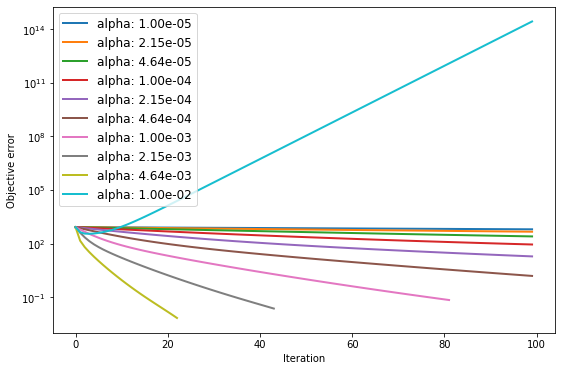

In [134]:
## Plot objective error vs. iteration (log scale)

fig, ax = plt.subplots(figsize = (9, 6))

for alpha in alpha_array:
    plt.semilogy(np.array(obj_pg[alpha])-opt,  linewidth = 2, label = 'alpha: '+'{:.2e}'.format(alpha) )
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.savefig("objective_error.pdf", bbox_inches='tight')

## Visualize Coefficients

pick the coefficient corresponding to alpha value with the minimum objective function value

In [129]:
min_obj= np.inf
min_alpha = None

In [130]:
for alpha in alpha_array:
    if obj_pg[alpha][-1] < min_obj:
        min_alpha = alpha
        min_obj = obj_pg[alpha][-1]

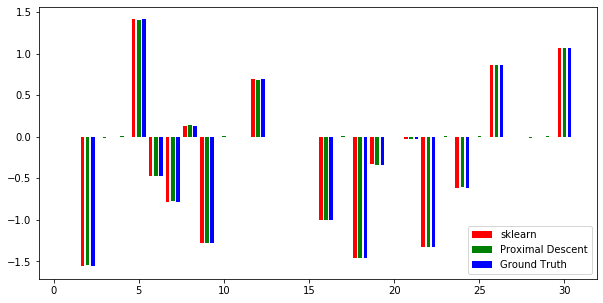

In [131]:
plt.figure(figsize = (10, 5))

ax = plt.subplot(111)

x = np.arange(1, dim+1)

ax.bar(x-0.3, clf.coef_, width=0.2, color='r', align='center', label = 'sklearn')
ax.bar(x, np.ravel(np.array(w_pg[min_alpha])), width=0.2, color='g', align='center', label = 'Proximal Descent')
ax.bar(x+0.3, np.ravel(np.array(w)), width=0.2, color='b', align='center', label = 'Ground Truth')

plt.legend()
plt.savefig("compare_models.pdf", bbox_inches='tight')
plt.show()
